## Collaborative Filtering for a Job Recommender System

##### Authored By: Fatima Azmat, Nathan Dignazio, and Launa Greer

### **Import Required Libraries**

In [1]:
from cf_client import JobAppDatasets
import warnings

### **Initialize Notebook Settings**

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#%matplotlib notebook  --> Uncomment to make CSR matrix preview interactive
%load_ext autoreload
%autoreload 2

### **Load and Preview Datasets**

The data is sourced from CareerBuilder.com's [Job Recommendation Challenge](https://www.kaggle.com/c/job-recommendation/data), hosted on Kaggle in 2012.

In [4]:
datasets = JobAppDatasets()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,Group
0,47,1,Train,Paramount,CA,US,90723,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0,High School
1,72,1,Train,La Mesa,CA,US,91941,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0,Post-Graduate


,UserID,WindowID,Split,ApplicationDate,JobID
0,47,1,Train,2012-04-04 15:56:23.537,169528
1,47,1,Train,2012-04-06 01:03:00.003,284009


,JobID,WindowID,Title,Description,Requirements,City,State,Country,Zip5,StartDate,EndDate
0,1,1,Security Engineer/Technical Lead,<p>Security Clearance Required:&nbsp; Top Secr...,<p>SKILL SET</p>\r<p>&nbsp;</p>\r<p>Network Se...,Washington,DC,US,20531,2012-03-07 13:17:01.643,2012-04-06 23:59:59
1,4,1,SAP Business Analyst / WM,<strong>NO Corp. to Corp resumes&nbsp;are bein...,<p><b>WHAT YOU NEED: </b></p>\r<p>Four year co...,Charlotte,NC,US,28217,2012-03-21 02:03:44.137,2012-04-20 23:59:59


,UserID,WindowID,Split,Sequence,JobTitle
0,47,1,Train,1,National Space Communication Programs-Special ...
1,47,1,Train,2,Detention Officer


,Window,Train Start,Train End / Test Start,Test End
0,1,2012-04-01 00:00:00,2012-04-10 00:00:00,2012-04-14 00:00:00
1,2,2012-04-14 00:00:00,2012-04-23 00:00:00,2012-04-27 00:00:00
2,3,2012-04-27 00:00:00,2012-05-06 00:00:00,2012-05-10 00:00:00
3,4,2012-05-10 00:00:00,2012-05-19 00:00:00,2012-05-23 00:00:00
4,5,2012-05-23 00:00:00,2012-06-01 00:00:00,2012-06-05 00:00:00
5,6,2012-06-05 00:00:00,2012-06-14 00:00:00,2012-06-18 00:00:00
6,7,2012-06-18 00:00:00,2012-06-27 00:00:00,2012-07-01 00:00:00


### **Preview Example Train and Test Sets**

In [5]:
train, test, masked_app_ids, user_lookup, job_lookup = datasets.create_train_and_test_sets(
        window_id=1, 
        users_as_rows=True,
        app_threshold=15,
        pct_test=0.2, 
        seed=1,
        random_mask=True)

,count
UserID,
296500,2473
1127206,1157
447922,953
985229,426
853630,304
...,...
886300,15
1359953,15
302900,15


,count
JobID,
601021,188
98665,172
10312,162
246611,161
187358,160
...,...
157933,15
773751,15
773562,15


#### Preview and Summarize Training Matrix

In [6]:
datasets.summarize_csr_matrix(train)

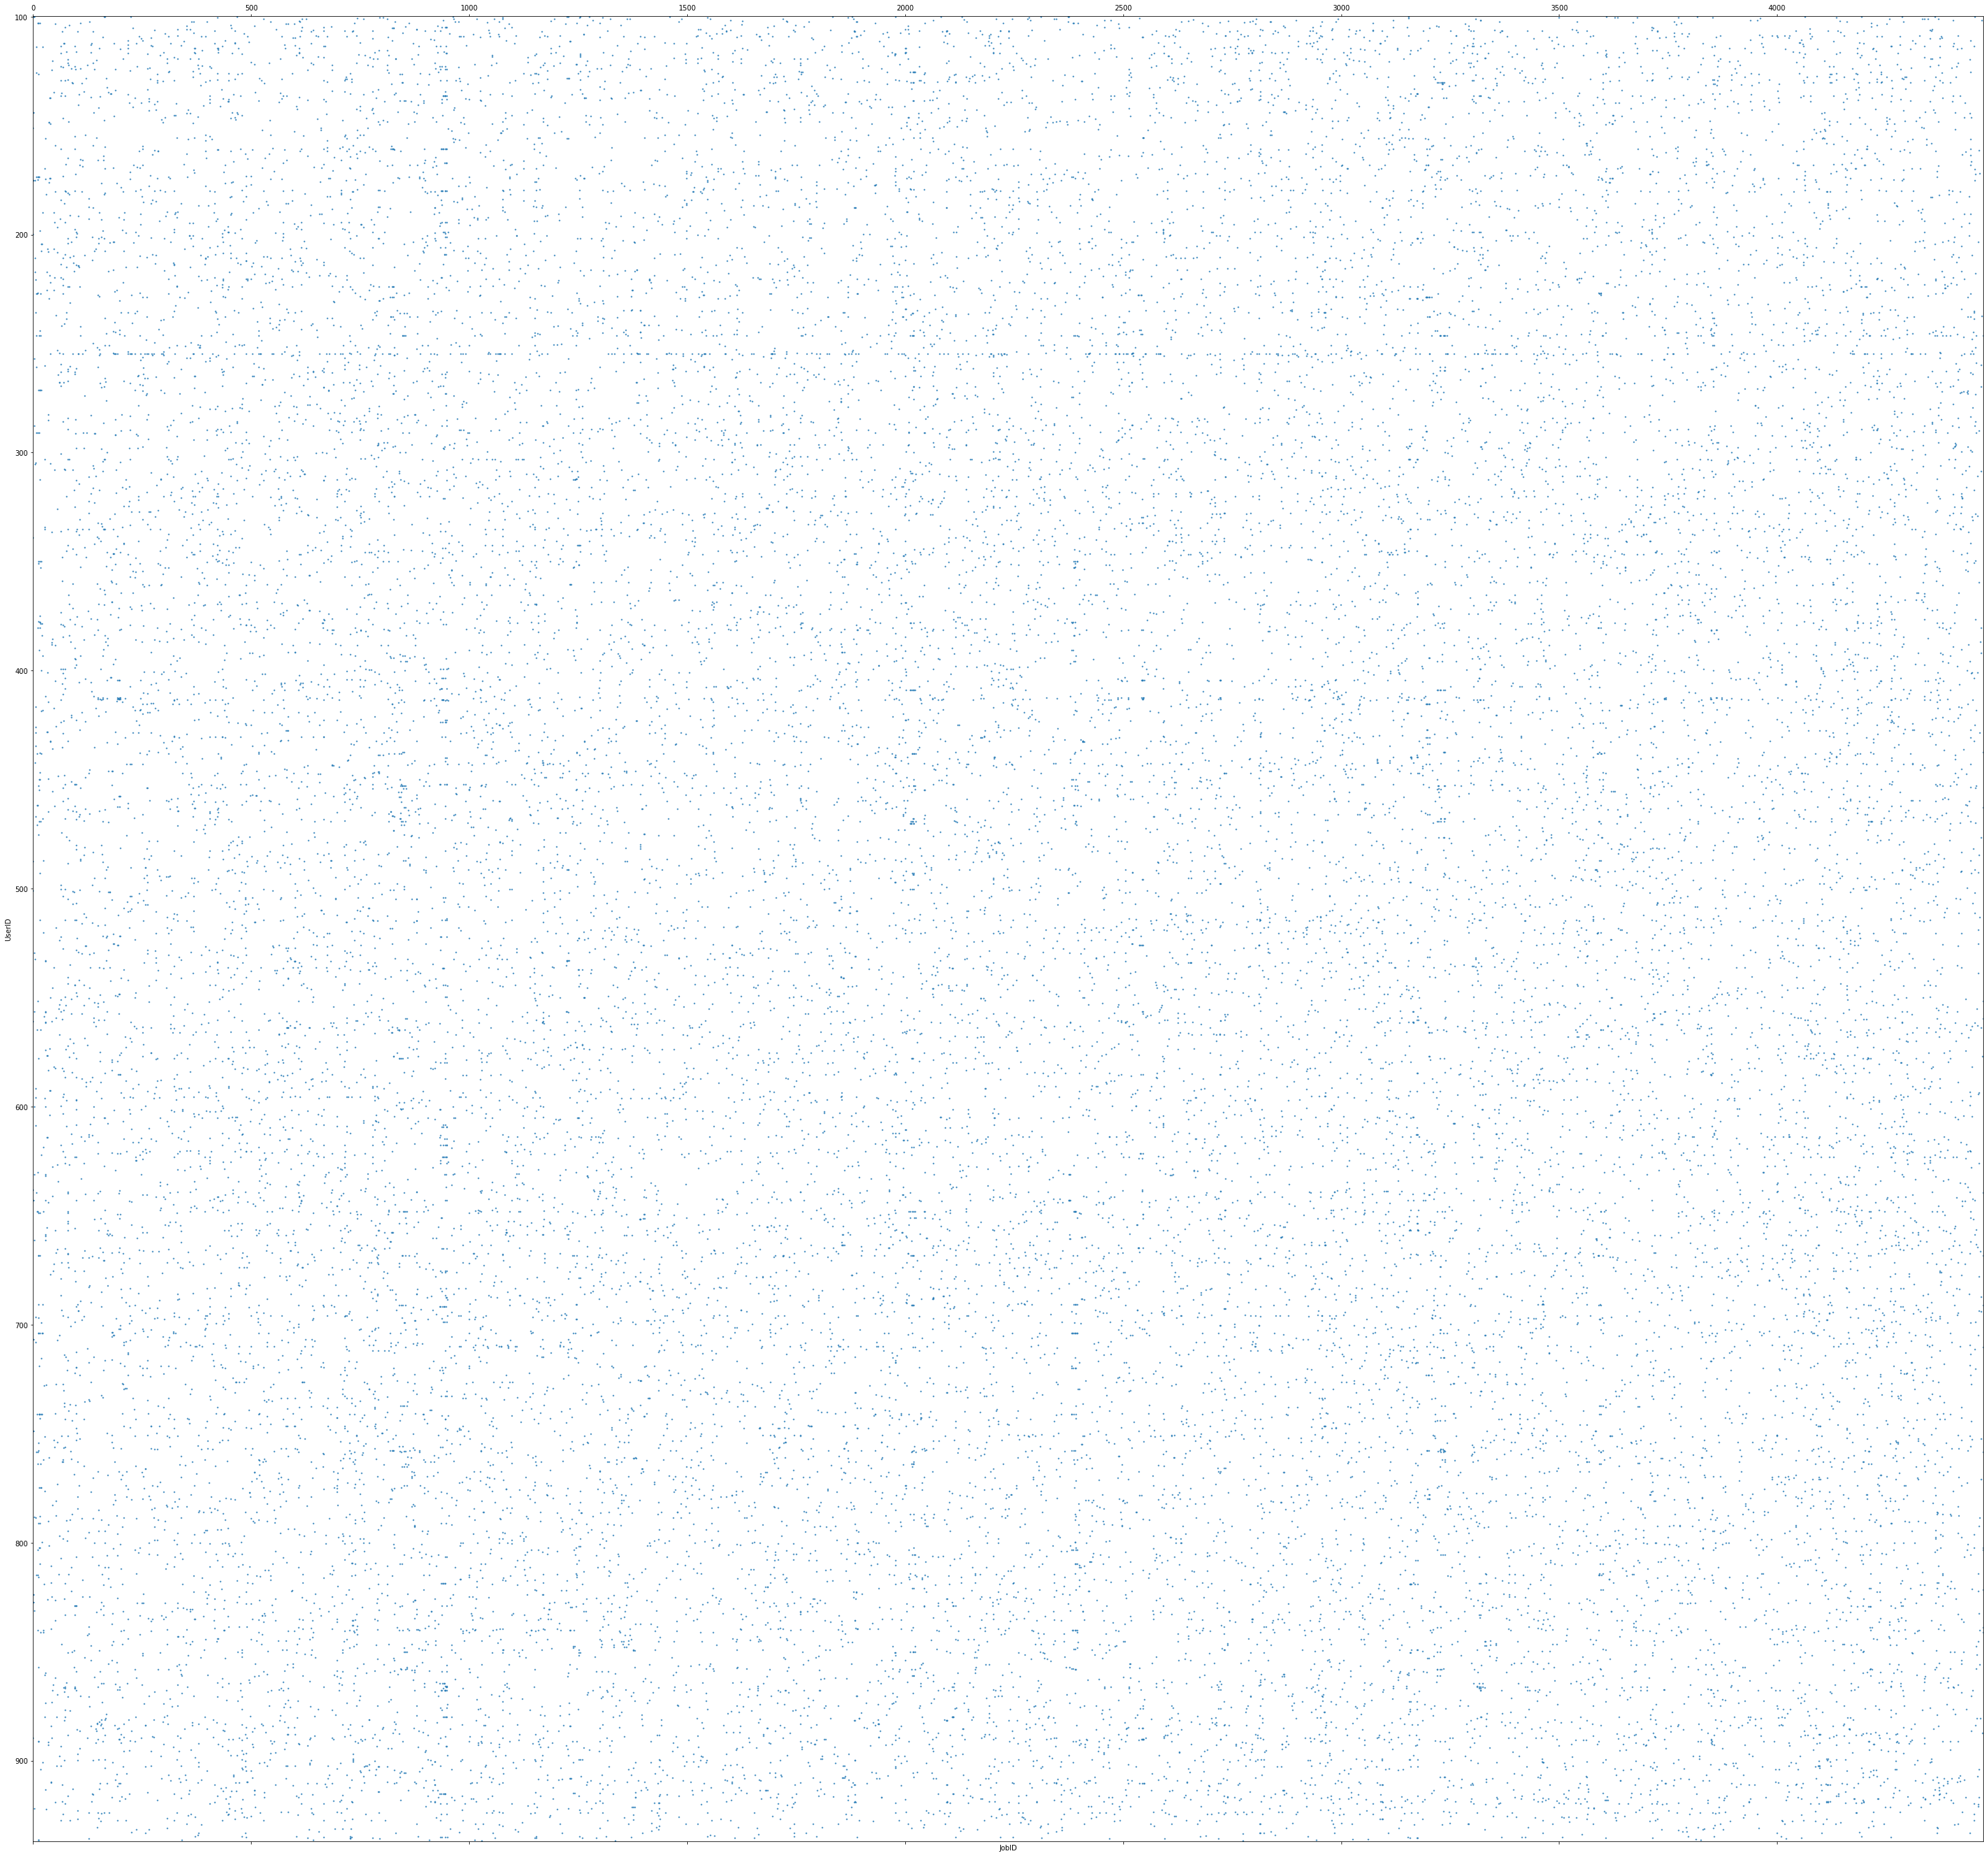

In [7]:
datasets.preview_csr_matrix(train)

#### Preview and Summarize Test Matrix

In [9]:
datasets.summarize_csr_matrix(test)

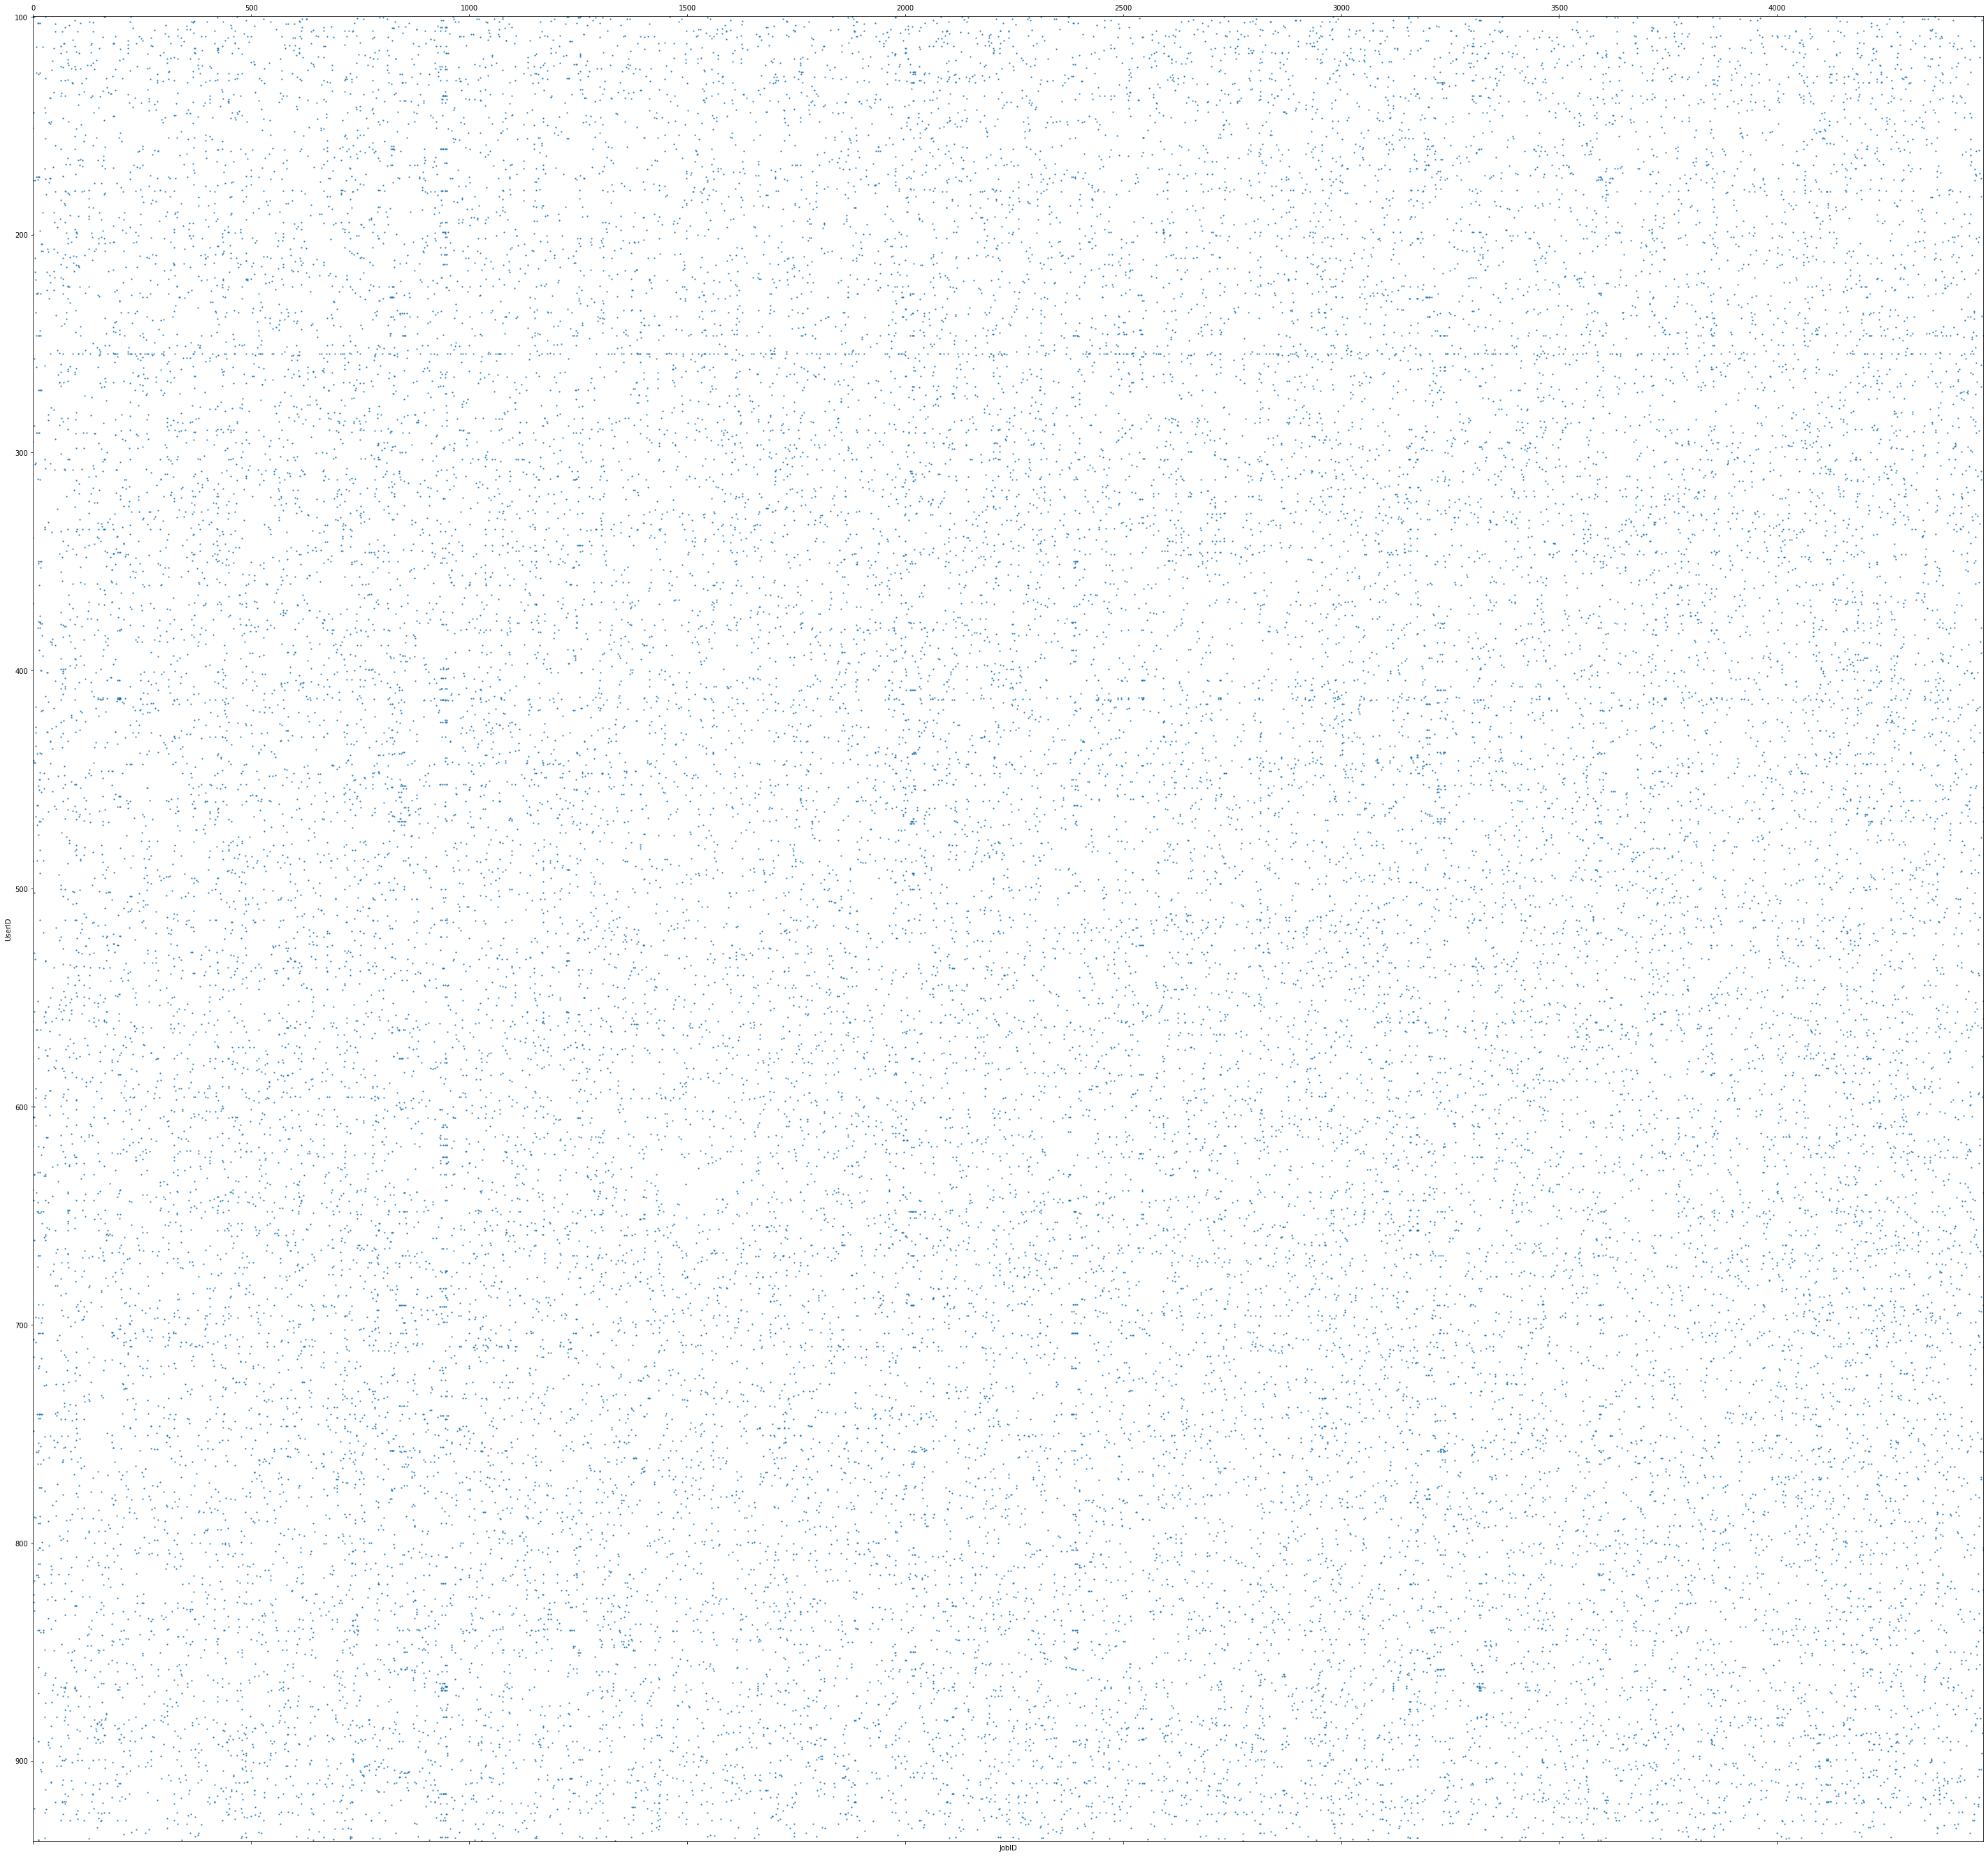

In [10]:
datasets.preview_csr_matrix(test)

### **Tune Hyperparameters Using Cross Validation**

In [ ]:
turning_results = datasets.tune_hyperparameters(
    window_id=1,
    users_as_rows=True,
    app_threshold=15,
    subset_pct=0.5,
    pct_test=0.2, 
    num_iterations=10,
    max_nmf_iterations=500,
    k_range=(10, 40), 
    random_mask=True)

### **Train Data Using NMF**

In [64]:
optimal_num_components = 40
alpha = 0
#optimal_num_components, alpha, best_model = tuning_results

training_results = datasets.train_data(
        optimal_num_components,
        alpha,
        window_id=1,
        users_as_rows=True,
        app_threshold=15,
        pct_test=0.2,
        subset_pct=0.5,
        num_iterations=3,
        max_nmf_iterations=500,
        random_mask=True)

,Index,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,Group
0,0,554,1,Train,Altamonte Springs,FL,US,32701,Bachelor's,Legal Studies,2006-12-01 00:00:00,2,4.0,No,No,0,College
1,1,769,1,Test,Roselle,IL,US,60172,Bachelor's,Radio-Television,2011-05-01 00:00:00,5,5.0,Yes,No,0,College
2,2,1697,1,Train,Justice,IL,US,60458,High School,Not Applicable,2007-01-01 00:00:00,4,6.0,NaN,No,0,High School
3,3,2393,1,Train,Mesa,AZ,US,85210,High School,Not Applicable,1993-01-01 00:00:00,3,13.0,Yes,No,0,High School
4,4,2528,1,Train,Lombard,IL,US,60148,Vocational,Medical assistant,2011-06-01 00:00:00,4,23.0,No,No,0,College
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,4195,1469936,1,Train,Indianapolis,IN,US,46237,None,history,NaN,0,NaN,NaN,No,0,None
4196,4196,1470559,1,Train,Jacksonville,FL,US,32099,High School,Not Applicable,1997-01-01 00:00:00,3,9.0,No,No,0,High School
4197,4197,1471624,1,Train,North Lauderdale,FL,US,33068,High School,Not Applicable,NaN,5,8.0,No,No,0,High School
4198,4198,1471729,1,Train,Milford,NH,US,03055,Bachelor's,History,2011-01-01 00:00:00,3,4.0,Yes,No,0,College


,Index,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,Group
0,0,554,1,Train,Altamonte Springs,FL,US,32701,Bachelor's,Legal Studies,2006-12-01 00:00:00,2,4.0,No,No,0,College
1,1,769,1,Test,Roselle,IL,US,60172,Bachelor's,Radio-Television,2011-05-01 00:00:00,5,5.0,Yes,No,0,College
2,2,1697,1,Train,Justice,IL,US,60458,High School,Not Applicable,2007-01-01 00:00:00,4,6.0,NaN,No,0,High School
3,3,2393,1,Train,Mesa,AZ,US,85210,High School,Not Applicable,1993-01-01 00:00:00,3,13.0,Yes,No,0,High School
4,4,2528,1,Train,Lombard,IL,US,60148,Vocational,Medical assistant,2011-06-01 00:00:00,4,23.0,No,No,0,College
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,4180,1470559,1,Train,Jacksonville,FL,US,32099,High School,Not Applicable,1997-01-01 00:00:00,3,9.0,No,No,0,High School
4181,4181,1471624,1,Train,North Lauderdale,FL,US,33068,High School,Not Applicable,NaN,5,8.0,No,No,0,High School
4182,4182,1471683,1,Train,Seattle,WA,US,98126,Bachelor's,History,1985-01-01 00:00:00,6,26.0,Yes,No,0,College
4183,4183,1471729,1,Train,Milford,NH,US,03055,Bachelor's,History,2011-01-01 00:00:00,3,4.0,Yes,No,0,College


,Index,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,Group
0,0,554,1,Train,Altamonte Springs,FL,US,32701,Bachelor's,Legal Studies,2006-12-01 00:00:00,2,4.0,No,No,0,College
1,1,769,1,Test,Roselle,IL,US,60172,Bachelor's,Radio-Television,2011-05-01 00:00:00,5,5.0,Yes,No,0,College
2,2,1697,1,Train,Justice,IL,US,60458,High School,Not Applicable,2007-01-01 00:00:00,4,6.0,NaN,No,0,High School
3,3,2393,1,Train,Mesa,AZ,US,85210,High School,Not Applicable,1993-01-01 00:00:00,3,13.0,Yes,No,0,High School
4,4,2528,1,Train,Lombard,IL,US,60148,Vocational,Medical assistant,2011-06-01 00:00:00,4,23.0,No,No,0,College
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,4194,1469936,1,Train,Indianapolis,IN,US,46237,None,history,NaN,0,NaN,NaN,No,0,None
4195,4195,1470559,1,Train,Jacksonville,FL,US,32099,High School,Not Applicable,1997-01-01 00:00:00,3,9.0,No,No,0,High School
4196,4196,1471624,1,Train,North Lauderdale,FL,US,33068,High School,Not Applicable,NaN,5,8.0,No,No,0,High School
4197,4197,1471729,1,Train,Milford,NH,US,03055,Bachelor's,History,2011-01-01 00:00:00,3,4.0,Yes,No,0,College


##### Mean AUC

In [60]:
sum(mean_aucs_for_folds) / len(mean_aucs_for_folds)

0.9436666666666667

##### Average AUC - High School

In [61]:
high_school_aucs = [d["High School"] for d in group_aucs_for_folds]
sum(high_school_aucs) / len(high_school_aucs)

0.9461842218489607

##### Average AUC - No High School

In [62]:
no_high_school_aucs = [d["None"] for d in group_aucs_for_folds]
sum(no_high_school_aucs) / len(no_high_school_aucs)

0.9414807858383943

### **Calculate Fairness Metrics**

In [77]:
# Retrieve index of highest-performing fold (i.e., that with the highest AUC)
index_mean_auc_max = mean_aucs_for_folds.index(max(mean_aucs_for_folds))

# Retrieve the group predictions from the best fold
best_fold_pred_dict = group_preds_for_folds[index_mean_auc_max]
best_fold_pred_values = list(best_group_pred_dict.values())

# Retrieve the actual group application interactions from the best fold
best_fold_actual_dict = group_actual_for_folds[index_mean_auc_max]
best_fold_actual_values = list(best_fold_actual_dict.values())

# Pair group predicted and actual values
group_true_and_preds = list(zip(best_fold_actual_values, best_fold_pred_values))

# Retrieve group names
group_names = ["None", "High School", "College", "Post-Graduate"]

##### Value Unfairness

In [78]:
datasets.fairness_df(group_true_and_preds, datasets.value_unfairness, group_names)

,None,High School,College,Post-Graduate
group_names,,,,
None,0.000000,0.001943,0.001360,0.001375
High School,0.001943,0.000000,0.001673,0.001837
College,0.001360,0.001673,0.000000,0.001255
Post-Graduate,0.001375,0.001837,0.001255,0.000000


##### Absolute Unfairness

In [79]:
datasets.fairness_df(group_true_and_preds, datasets.absolute_unfairness, group_names)

,None,High School,College,Post-Graduate
group_names,,,,
None,0.000000,0.001376,0.000948,0.000933
High School,0.001376,0.000000,0.001233,0.001306
College,0.000948,0.001233,0.000000,0.000882
Post-Graduate,0.000933,0.001306,0.000882,0.000000


##### Underestimation Unfairness

In [80]:
datasets.fairness_df(group_true_and_preds, datasets.underestimation_unfairness, group_names)

,None,High School,College,Post-Graduate
group_names,,,,
None,0.000000,0.001416,0.000996,0.000989
High School,0.001416,0.000000,0.001222,0.001340
College,0.000996,0.001222,0.000000,0.000927
Post-Graduate,0.000989,0.001340,0.000927,0.000000


##### Overestimation Unfairness

In [81]:
datasets.fairness_df(group_true_and_preds, datasets.overestimation_unfairness, group_names)

,None,High School,College,Post-Graduate
group_names,,,,
None,0.000000,0.000527,0.000364,0.000385
High School,0.000527,0.000000,0.000452,0.000497
College,0.000364,0.000452,0.000000,0.000328
Post-Graduate,0.000385,0.000497,0.000328,0.000000


##### Non-Parity Unfairness

In [82]:
datasets.fairness_df(group_true_and_preds, datasets.nonparity_unfairness, group_names)

,None,High School,College,Post-Graduate
group_names,,,,
None,0.000000,0.000602,0.000330,0.000175
High School,0.000602,0.000000,0.000272,0.000426
College,0.000330,0.000272,0.000000,0.000154
Post-Graduate,0.000175,0.000426,0.000154,0.000000
